### A prediction model for Salary_hike

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [73]:
df=pd.read_csv('Salary_Data.csv')
df.head()         

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Performing EDA on given Data

In [74]:
df.shape

(30, 2)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [76]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [77]:
df[df.duplicated()].shape

(0, 2)

In [78]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [79]:
df=df.rename({'YearsExperience':'YearsExp'},axis=1)

In [80]:
df

,YearsExp,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### Data Visualization 

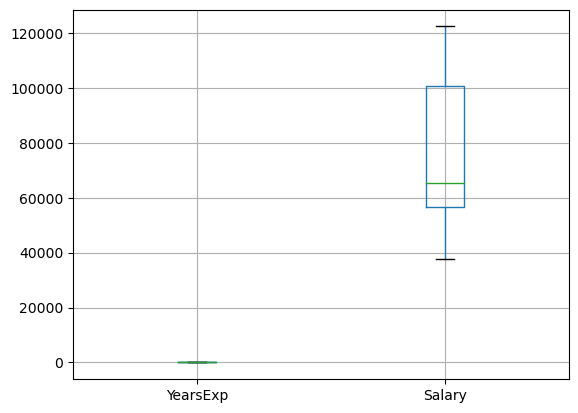

In [81]:
df.boxplot()
plt.show()

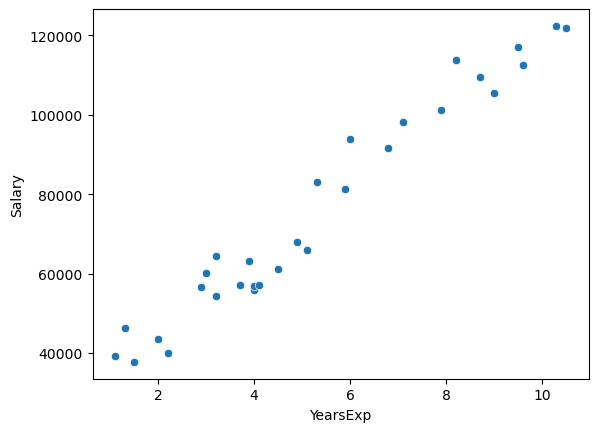

In [82]:
sns.scatterplot(x='YearsExp',y='Salary',data=df)
plt.show()

### Correlation

In [83]:
rel=df.corr()
rel

,YearsExp,Salary
YearsExp,1.000000,0.978242
Salary,0.978242,1.000000


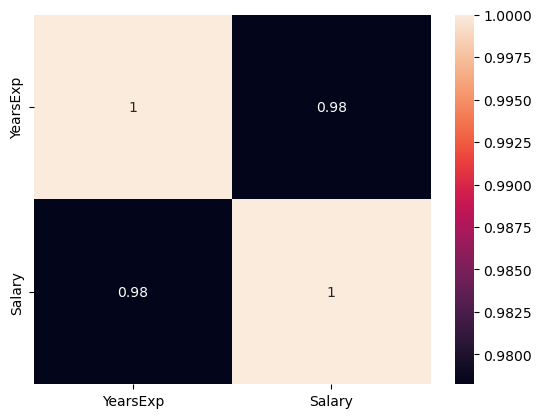

In [84]:
sns.heatmap(rel,annot=True)
plt.show()

### Model Building

In [85]:
import statsmodels.formula.api as sfa

In [86]:
model=sfa.ols('Salary~YearsExp',data=df).fit()

### Model Testing

In [87]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 31 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        21:19:23   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExp    9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The required equation will be: y(Salary)=2.58+9449.96*YearsExp

## Predictiction for Salary_hike

In [88]:
newval=pd.Series([5,2,4,9])
newval

0    5
1    2
2    4
3    9
dtype: int64

In [89]:
pred_sal=pd.DataFrame(newval,columns=['YearsExp'])

In [90]:
model.predict(pred_sal)

0     73042.011806
1     44692.124842
2     63592.049484
3    110841.861092
dtype: float64

In [91]:
pred_sal['Pre_salary']=model.predict(pred_sal)

In [92]:
round(pred_sal)

,YearsExp,Pre_salary
0,5,73042.0
1,2,44692.0
2,4,63592.0
3,9,110842.0


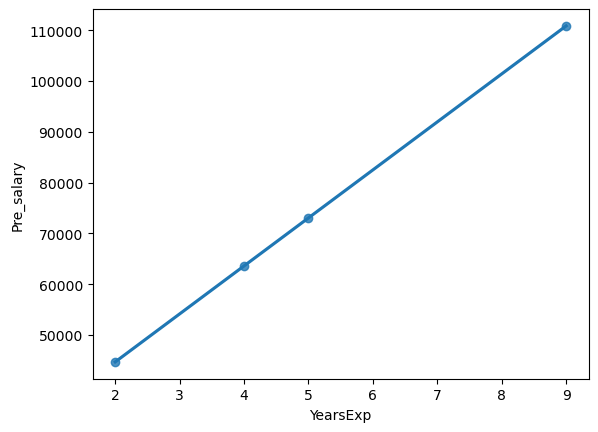

In [93]:
sns.regplot(x='YearsExp',y='Pre_salary',data=pred_sal)
plt.show()

### Building the model by transformation:-

### 1.Normalizaton

In [94]:
df1=df
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
df1_scale=pd.DataFrame(ms.fit_transform(df1))

C:\Users\Nishant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


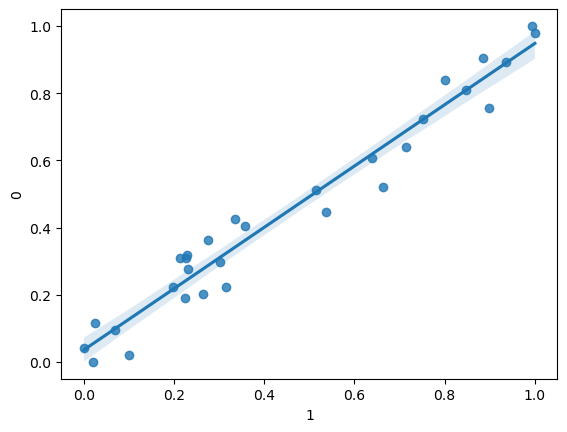

In [95]:
x=df1_scale.iloc[:,-1]
y=df1_scale.iloc[:,0]
sns.regplot(x,y)
plt.show()

In [96]:
model=sfa.ols('y~x',data=df1).fit()

In [97]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 31 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        21:19:25   Log-Likelihood:                 41.053
No. Observations:                  30   AIC:                            -78.11
Df Residuals:                      28   BIC:                            -75.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0359      0.020      1.777      0.086      -0.005       0.077
x              0.9120      0.037     24.950      0.000       0.837       0.987
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                         3.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2.Standardization

In [98]:
df2=df1
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df2_scale=pd.DataFrame(ss.fit_transform(df2))

C:\Users\Nishant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


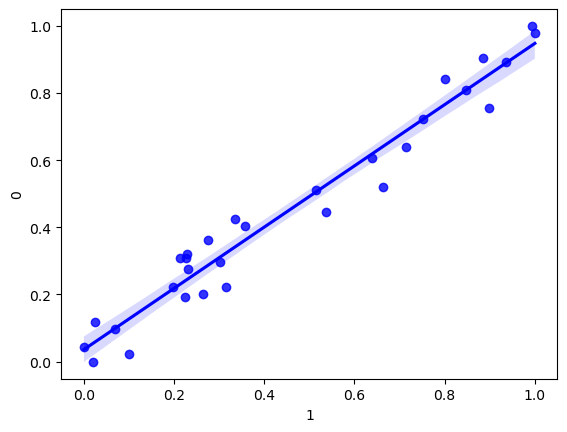

In [99]:
x=df1_scale.iloc[:,-1] 
y=df1_scale.iloc[:,0]
sns.regplot(x,y,color='b')
plt.show()

In [100]:
model=sfa.ols('y~x',data=df1_scale).fit()

In [101]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 31 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        21:19:26   Log-Likelihood:                 41.053
No. Observations:                  30   AIC:                            -78.11
Df Residuals:                      28   BIC:                            -75.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0359      0.020      1.777      0.086      -0.005       0.077
x              0.9120      0.037     24.950      0.000       0.837       0.987
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                         3.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3.Log Transformation

C:\Users\Nishant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


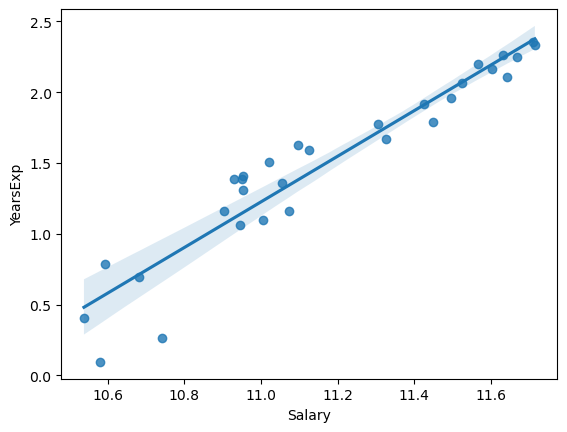

In [102]:
df2_scale = np.log(df2)
x=df2_scale.iloc[:,-1] 
y=df2_scale.iloc[:,0] 
sns.regplot(x,y)
plt.show()

In [103]:
model=sfa.ols("y~x",data=df2_scale).fit()

In [104]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Sat, 31 Dec 2022   Prob (F-statistic):           7.40e-16
Time:                        21:19:26   Log-Likelihood:                 7.4195
No. Observations:                  30   AIC:                            -10.84
Df Residuals:                      28   BIC:                            -8.037
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.4901      1.101    -14.977      0.000     -18.745     -14.235
x              1.6104      0.098     16.353      0.000       1.409       1.812
==============================================================================
Omnibus:                        6.898   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                5.142
Skew:                          -0.840   Prob(JB):                       0.0765
Kurtosis:                       4.136   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4.Squreroot Transformation

C:\Users\Nishant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


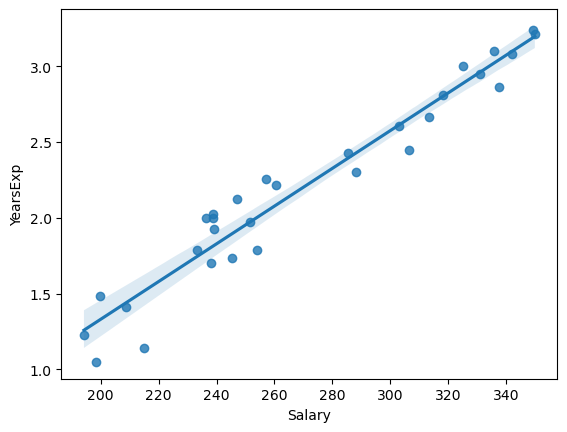

In [105]:
df2_scale = np.sqrt(df2)
x=df2_scale.iloc[:,-1] 
y=df2_scale.iloc[:,0] 
sns.regplot(x,y)
plt.show()

In [106]:
model=sfa.ols("y~x",data=df2_scale).fit()

In [107]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Sat, 31 Dec 2022   Prob (F-statistic):           7.58e-19
Time:                        21:19:27   Log-Likelihood:                 14.149
No. Observations:                  30   AIC:                            -24.30
Df Residuals:                      28   BIC:                            -21.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1612      0.161     -7.208      0.000      -1.491      -0.831
x              0.0125      0.001     21.315      0.000       0.011       0.014
==============================================================================
Omnibus:                        1.382   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.501   Jarque-Bera (JB):                1.219
Skew:                          -0.461   Prob(JB):                        0.544
Kurtosis:                       2.646   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Conclusion:- From Above analysis it is clear that Normalization and Standardization gives the same R2 Score.